In [1]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


In [2]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']

dir = dirs[1]
total_df=pd.read_csv(f'../{dir}/clus_data/{dir}_total.csv')
def f(col1,col2):
    return col1/col2

# total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
# total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)

# total_df['total_income']=total_df['total_income']/1000000
# total_df['total_cost']=total_df['total_cost']/1000000
# total_df['total']=total_df.iloc[:,1:].sum(axis=1)


# total_df['total_income'] = np.log2(total_df['total_income'])
# total_df['total_cost'] = np.log2(total_df['total_cost'])


# total_df=total_df.iloc[:, [1, 3]]
total_df=total_df.iloc[:,1:]
total_df[total_df.isnull().any(axis=1)]
total_df_corr =total_df
total_df=total_df[['member','Male_count','Female_count','age','literacy','vehicle','motorcycle','facilities','total_cost','total_income']]

In [3]:
total_df.columns


Index(['member', 'Male_count', 'Female_count', 'age', 'literacy', 'vehicle',
       'motorcycle', 'facilities', 'total_cost', 'total_income'],
      dtype='object')

**Robust scaler**

In [4]:
from sklearn.preprocessing import RobustScaler

rbs_data_scaled = RobustScaler(with_centering = True, with_scaling = True).fit_transform(total_df)



**elbow rbs**

within cluster sum of squared distance for k=2:  150796.09096389532
within cluster sum of squared distance for k=3:  123222.29321075928
within cluster sum of squared distance for k=4:  105009.25729799052
within cluster sum of squared distance for k=5:  96362.72677914542
within cluster sum of squared distance for k=6:  88934.20336050165
within cluster sum of squared distance for k=7:  78567.64091619021
within cluster sum of squared distance for k=8:  72298.69536662908
within cluster sum of squared distance for k=9:  67623.27697306266
within cluster sum of squared distance for k=10:  64960.63265519936
within cluster sum of squared distance for k=11:  62006.962929812
within cluster sum of squared distance for k=12:  60057.417145890766
within cluster sum of squared distance for k=13:  56735.432431518435
within cluster sum of squared distance for k=14:  55555.16157623777
within cluster sum of squared distance for k=15:  52566.26796167238
within cluster sum of squared distance for k=16:  510

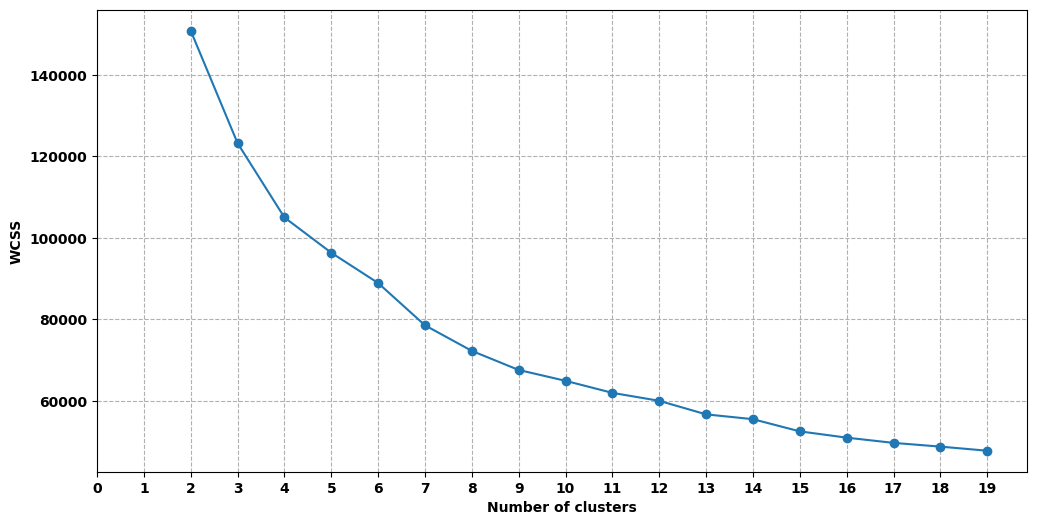

In [5]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(rbs_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette rbs**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


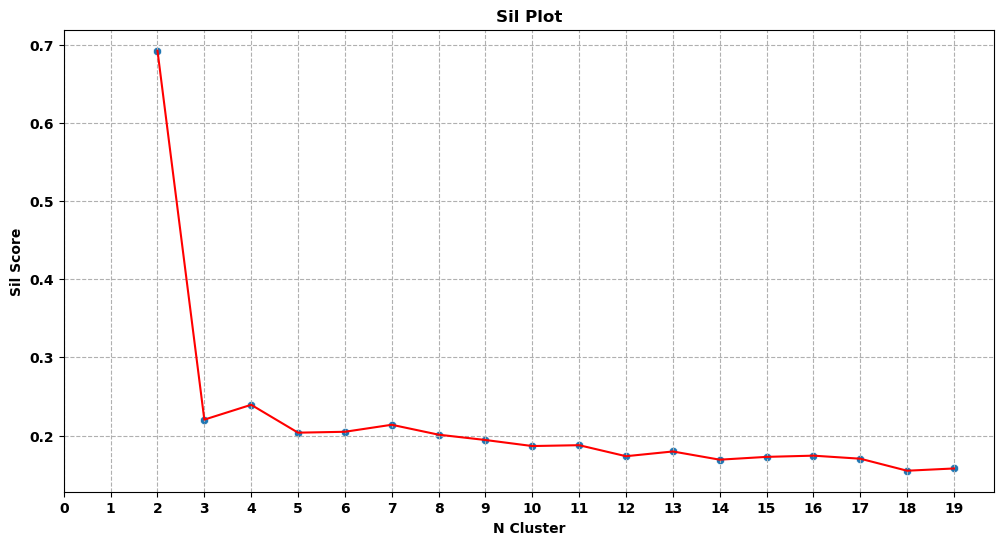

In [6]:
from sklearn.metrics import silhouette_score
df =rbs_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**PCA rbs**

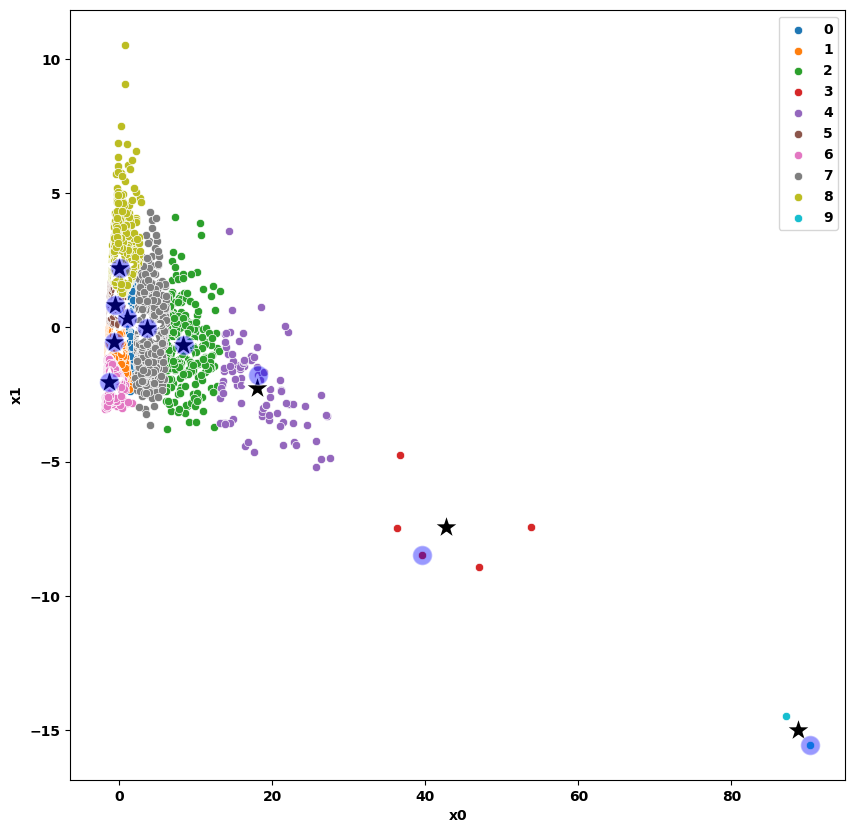

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(rbs_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**L2 norm**

In [8]:
l2_data_scaled = preprocessing.normalize(total_df, norm='l2')
l2_data_scaled = pd.DataFrame(l2_data_scaled, columns = total_df.columns)

**elbow l2**

within cluster sum of squared distance for k=2:  745.8949756574395
within cluster sum of squared distance for k=3:  343.7065538884025
within cluster sum of squared distance for k=4:  204.98116910420464
within cluster sum of squared distance for k=5:  139.62472464948647
within cluster sum of squared distance for k=6:  103.36742107984642
within cluster sum of squared distance for k=7:  86.74477786087132
within cluster sum of squared distance for k=8:  66.15964651284783
within cluster sum of squared distance for k=9:  56.53020654302814
within cluster sum of squared distance for k=10:  48.070032140986214
within cluster sum of squared distance for k=11:  33.28619268765395
within cluster sum of squared distance for k=12:  28.302131343179994
within cluster sum of squared distance for k=13:  24.339182119910195
within cluster sum of squared distance for k=14:  21.198141639535642
within cluster sum of squared distance for k=15:  18.29924659359292
within cluster sum of squared distance for k=16: 

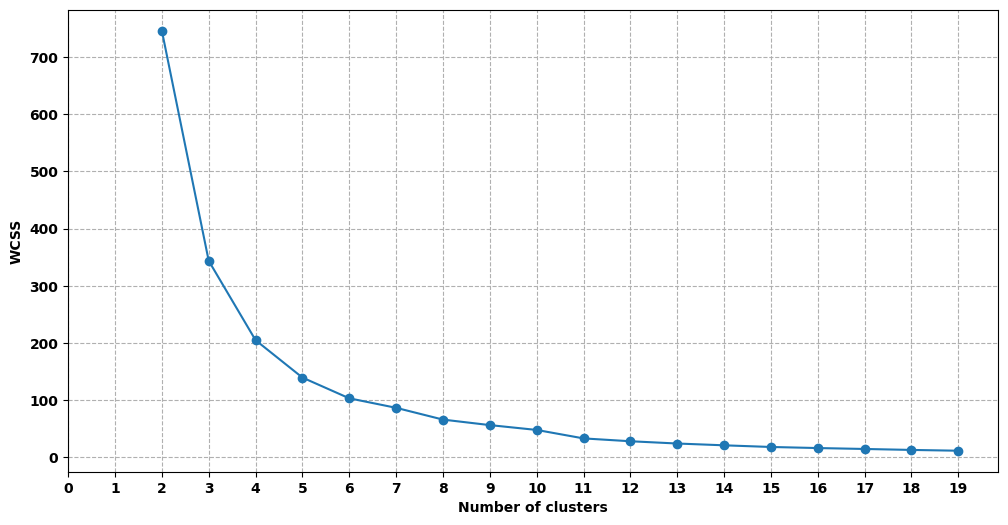

In [9]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(l2_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette l2**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


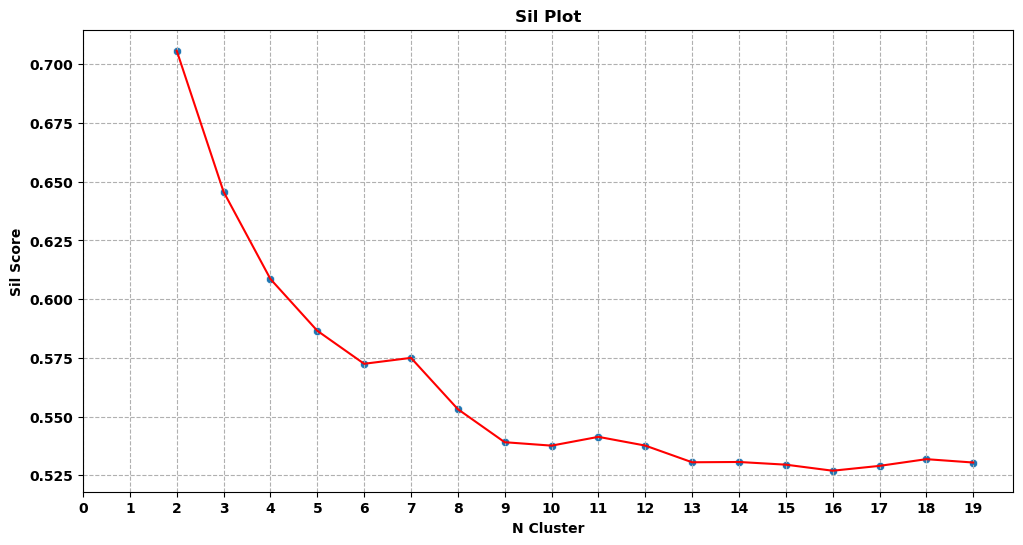

In [10]:
from sklearn.metrics import silhouette_score
df =l2_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

<p dir=rtl style="direction: rtl;text-align justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
این جا براساس شکستگی sil و elbow  و در رسم نمودار بعدی از آن استفاده می کنیم مقادیر 5 یا 6 مناسب است که ما مقدار 6 رو انتخاب میکنیم
</p>

**Pca l2**

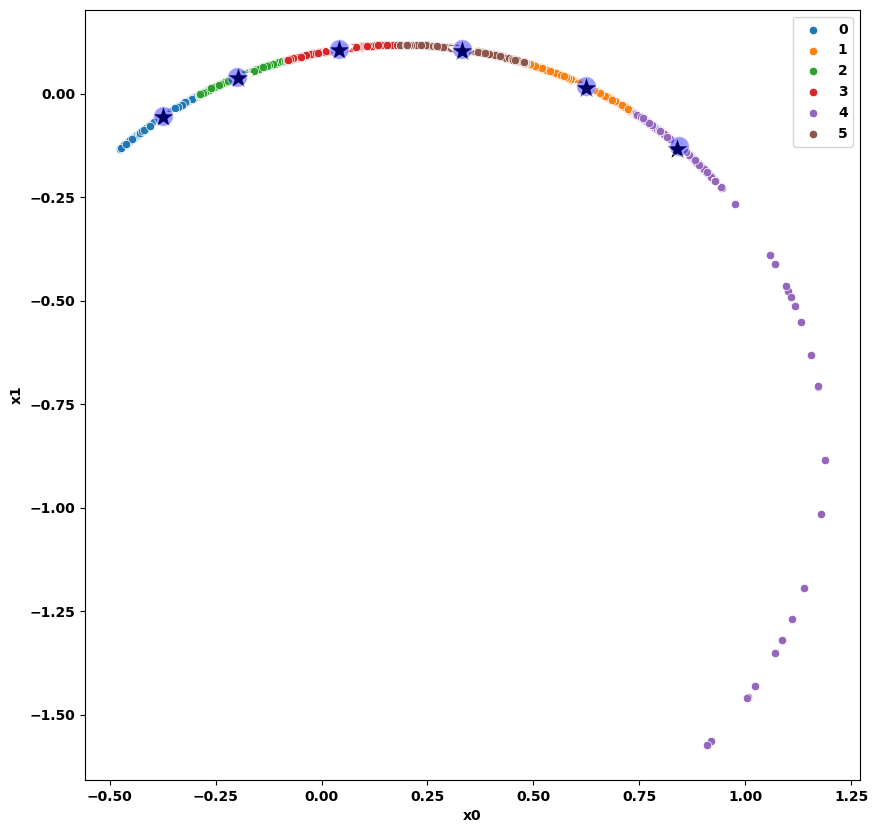

In [11]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(l2_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center l2**

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_12280\870627896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([17570,  2674, 15895,  6433,  2379,  9853], dtype=int64)

C:\Users\theki\AppData\Local\Temp\ipykernel_12280\4228730169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


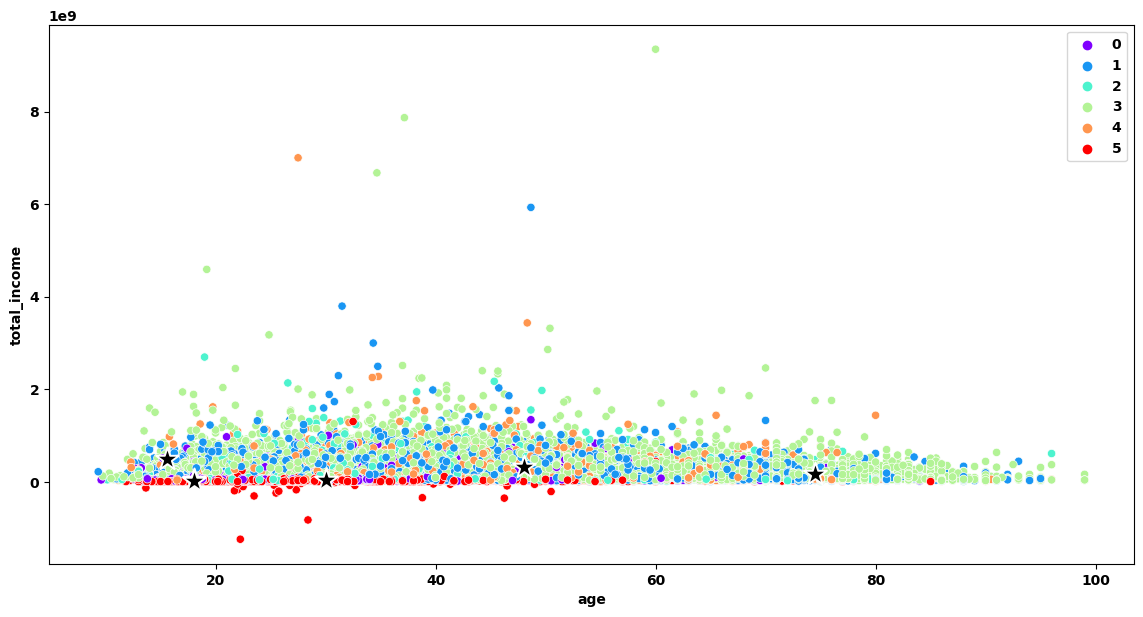

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 visualize**

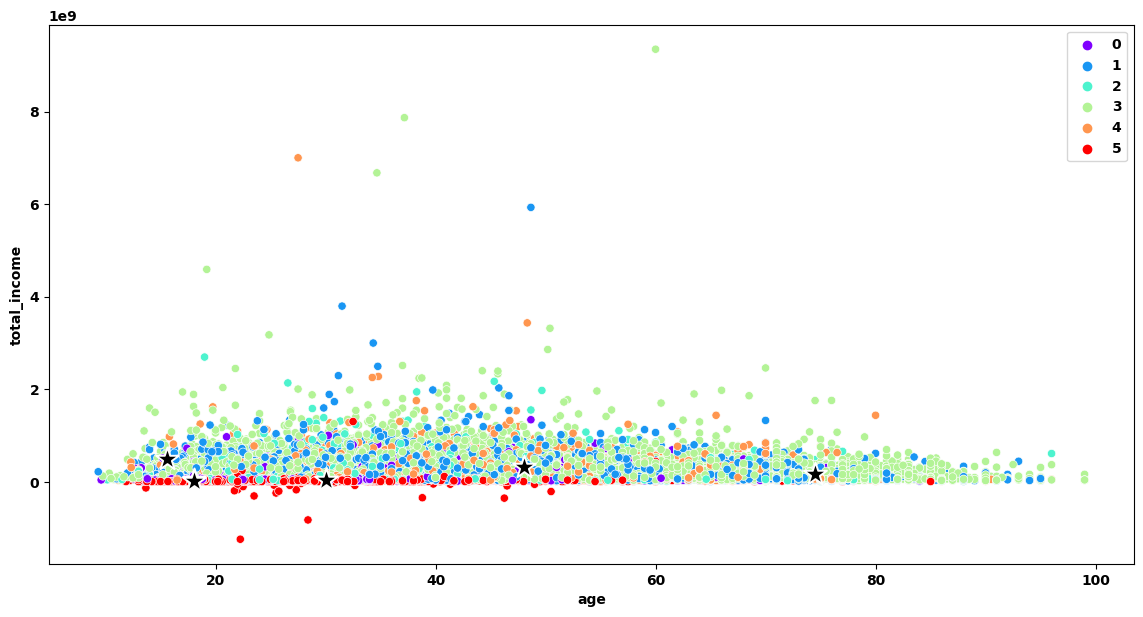

In [14]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 points**

In [15]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
6076,5,2,3,15.6,0.60,1,0,9,1.169525e+09,487050000.0,0
13034,3,2,1,48.0,1.00,1,1,9,1.963380e+08,307230000.0,4
1826,2,1,1,74.5,0.00,0,0,3,2.118500e+07,154700000.0,3
6294,4,1,3,18.0,0.75,0,0,3,1.262455e+07,37320000.0,1
9954,2,1,1,30.0,1.00,0,0,7,3.082778e+07,26380000.0,2
18137,1,1,0,18.0,1.00,0,0,5,1.552870e+08,19260000.0,5


**MaxAbs scaler**

In [16]:
scaler = MaxAbsScaler()
data_scaled =scaler.fit_transform(total_df)
data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)


**min_max scaler**

In [17]:
minmax_scaler = MinMaxScaler()
minmax_data_scaled =minmax_scaler.fit_transform(total_df)
minmax_data_scaled = pd.DataFrame(minmax_data_scaled, columns = total_df.columns)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
به نظر میاد احتمالا min_max scaler va MaxAbsScaler بهتر میتونه نقاط شکستگی نمودار elbow و Silhoeute رو نمایش بده
</p>

**elbow min_max**

within cluster sum of squared distance for k=2:  9011.454564117998
within cluster sum of squared distance for k=3:  6367.776192996964
within cluster sum of squared distance for k=4:  5969.582176128061
within cluster sum of squared distance for k=5:  4693.891480854171
within cluster sum of squared distance for k=6:  3498.835552145941
within cluster sum of squared distance for k=7:  3362.037756070631
within cluster sum of squared distance for k=8:  3211.4817409261823
within cluster sum of squared distance for k=9:  3155.3370793694885
within cluster sum of squared distance for k=10:  2808.543805533669
within cluster sum of squared distance for k=11:  2765.2693644294486
within cluster sum of squared distance for k=12:  2605.835662534082
within cluster sum of squared distance for k=13:  2544.3554518425813
within cluster sum of squared distance for k=14:  2328.0129261488614
within cluster sum of squared distance for k=15:  2287.7969701961056
within cluster sum of squared distance for k=16:  

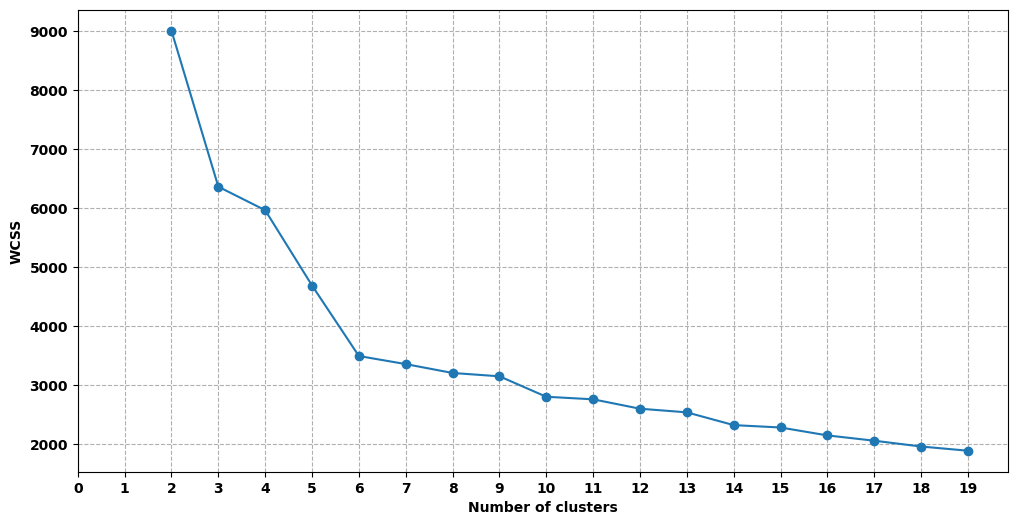

In [18]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(minmax_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette min_max**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


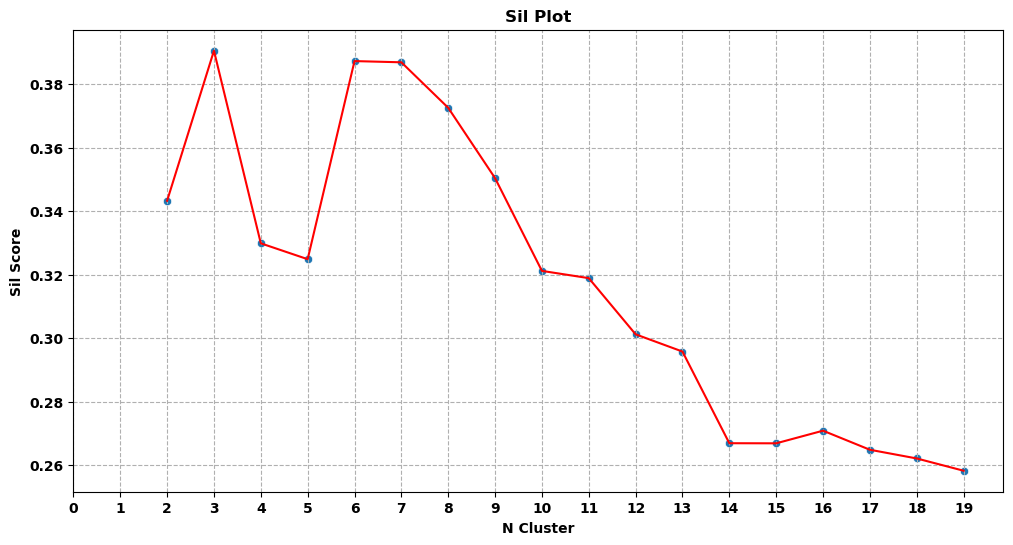

In [19]:
from sklearn.metrics import silhouette_score
df =minmax_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Pca min_max**

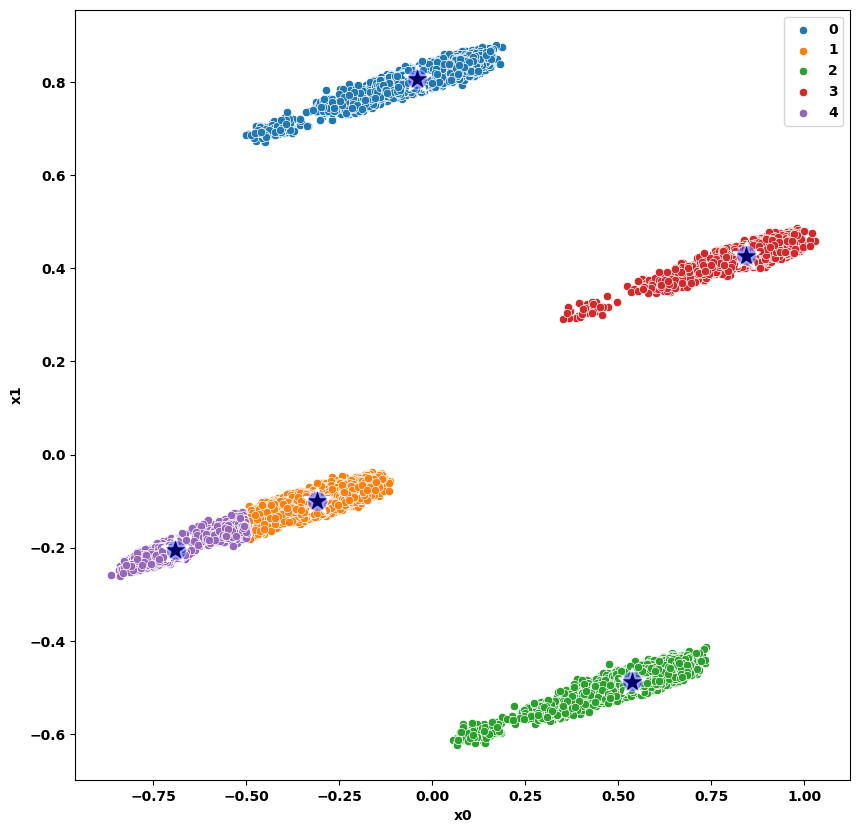

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(minmax_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**standard scaler**

In [21]:
z_scaler = StandardScaler()
z_data_scaled =z_scaler.fit_transform(total_df)
z_data_scaled = pd.DataFrame(z_data_scaled, columns = total_df.columns)


**elbow standard scaler**

within cluster sum of squared distance for k=2:  158169.68160491934
within cluster sum of squared distance for k=3:  140846.37192185898
within cluster sum of squared distance for k=4:  131451.34174334066
within cluster sum of squared distance for k=5:  123369.01975424674
within cluster sum of squared distance for k=6:  116735.46560291864
within cluster sum of squared distance for k=7:  109618.33989202419
within cluster sum of squared distance for k=8:  105749.32655677051
within cluster sum of squared distance for k=9:  100987.47215467415
within cluster sum of squared distance for k=10:  96046.6985207037
within cluster sum of squared distance for k=11:  93253.5433329709
within cluster sum of squared distance for k=12:  90267.63178637387
within cluster sum of squared distance for k=13:  88715.20822391556
within cluster sum of squared distance for k=14:  87106.86264715905
within cluster sum of squared distance for k=15:  84683.267378302
within cluster sum of squared distance for k=16:  82

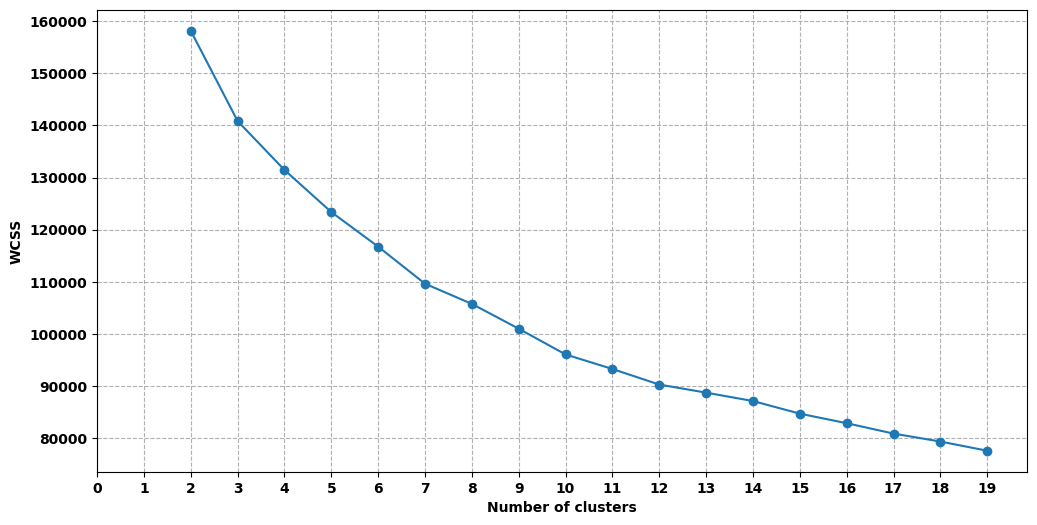

In [22]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(z_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

k=6 ro mishe ye noghte shekast darnazar gereft ama vaghean moshakhas nist kheily
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Silhouette standard scaler**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


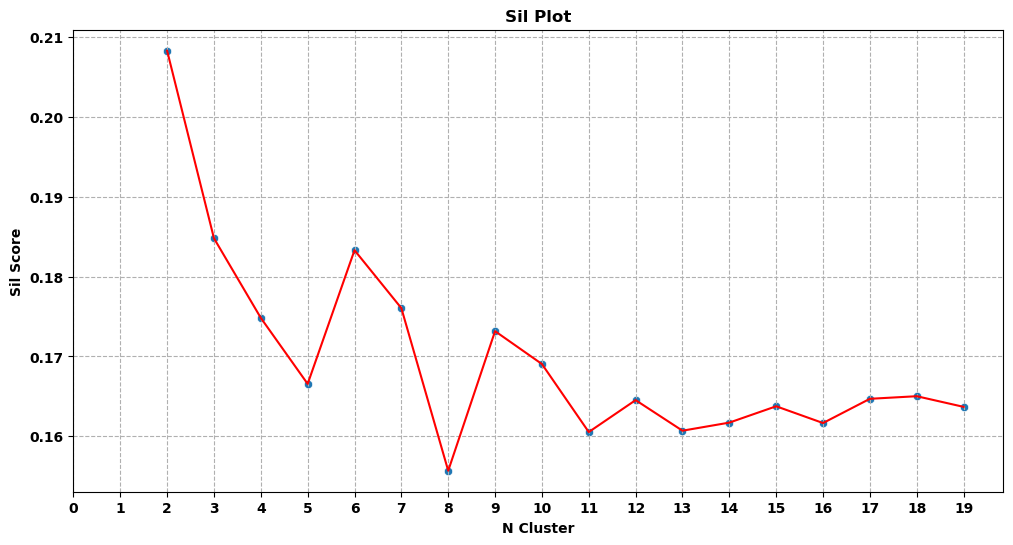

In [23]:
from sklearn.metrics import silhouette_score
df =z_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

mibinim ke natije Sil plot jaleb nist
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Pca standard scaler**

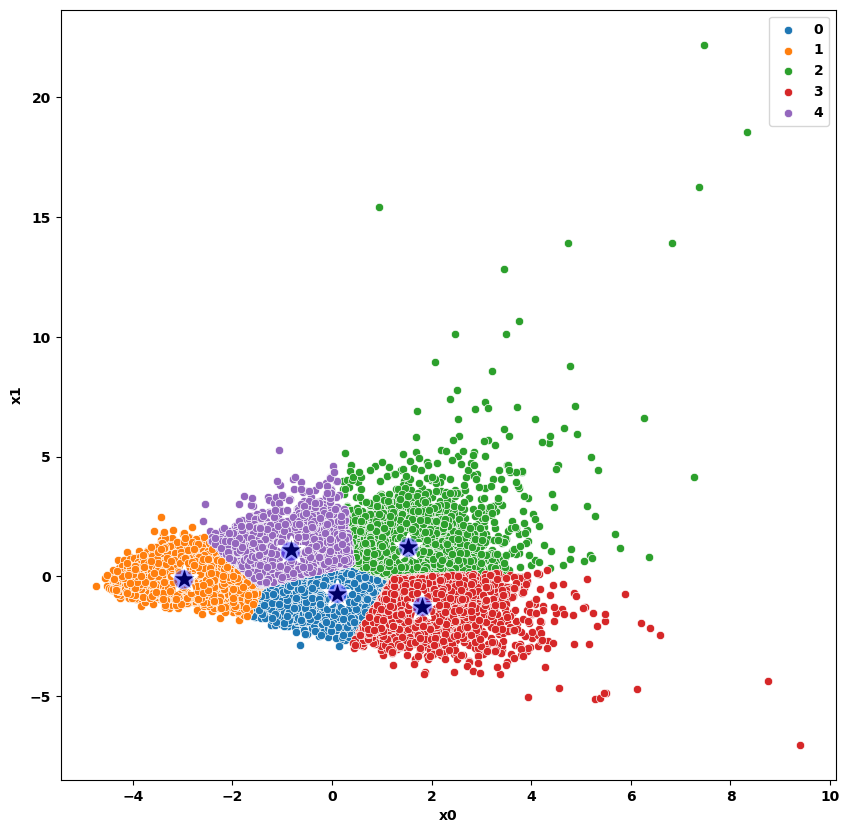

In [24]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(z_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center standard scaler visualization**

C:\Users\theki\AppData\Local\Temp\ipykernel_12280\224913684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


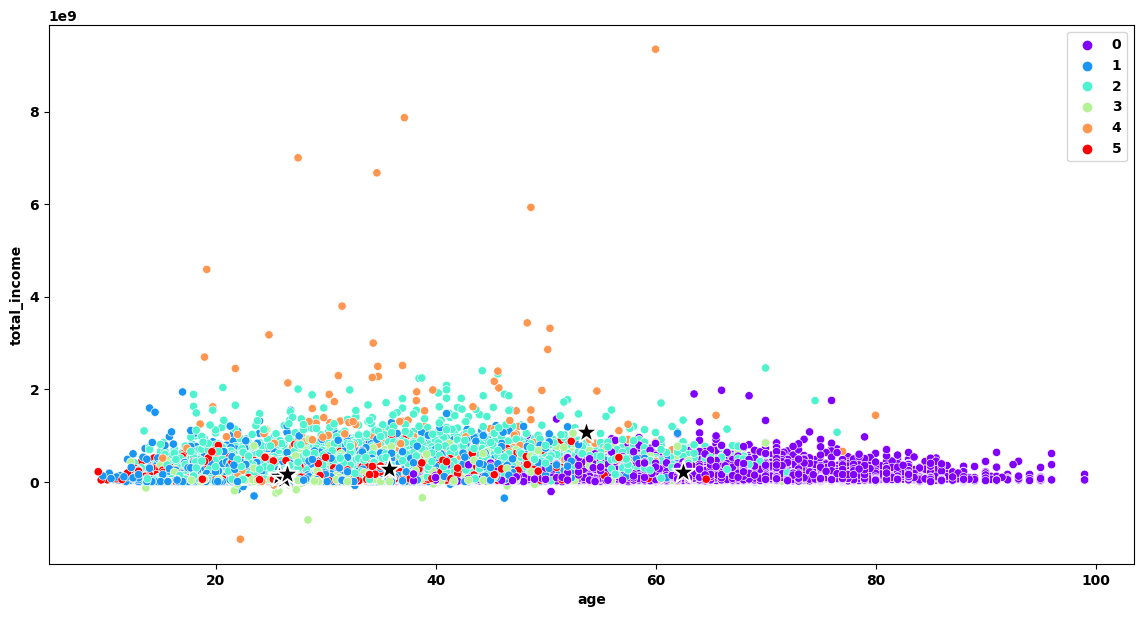

In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(z_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, z_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center standard scaler points**

In [26]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
17843,3,2,1,53.666667,0.666667,1,0,6,1.567312e+09,1.069460e+09,4
4651,4,2,2,35.750000,0.750000,1,0,7,8.026355e+07,2.769000e+08,2
9453,2,1,1,62.500000,0.500000,0,0,4,2.314439e+07,1.998500e+08,0
2223,4,2,2,26.500000,0.750000,0,0,5,5.391000e+07,1.670000e+08,5
3245,4,2,2,25.750000,0.750000,0,0,5,8.990552e+07,1.267300e+08,1
7221,4,2,2,26.250000,0.750000,1,0,7,2.053150e+08,4.799000e+07,3



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
از نمودار و این خوشه ها نتیجه به این شکل نشون داده میشه
</p>

In [27]:
# data_scaled=total_df

<Axes: >

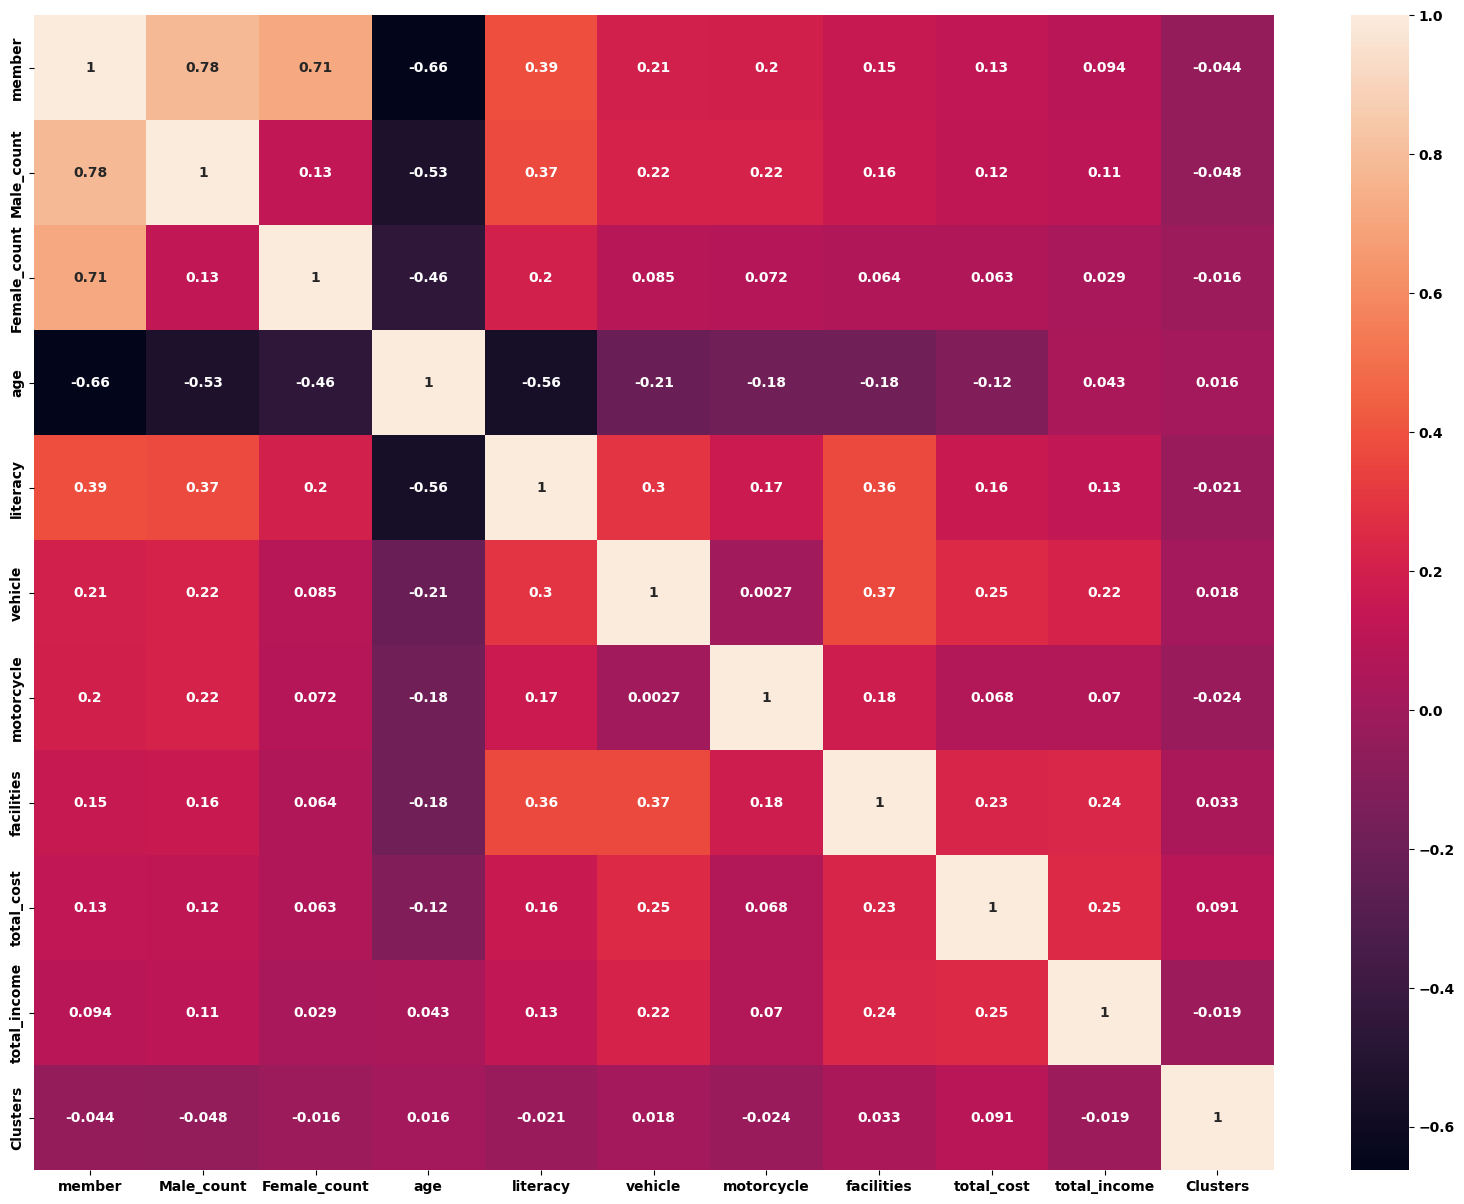

In [28]:
corr = pd.DataFrame(data_scaled).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر سن افراد خانواده بیشتر باشه هزینه هاشون کمتر میشه
</p>

**min_max scaler**

<Axes: >

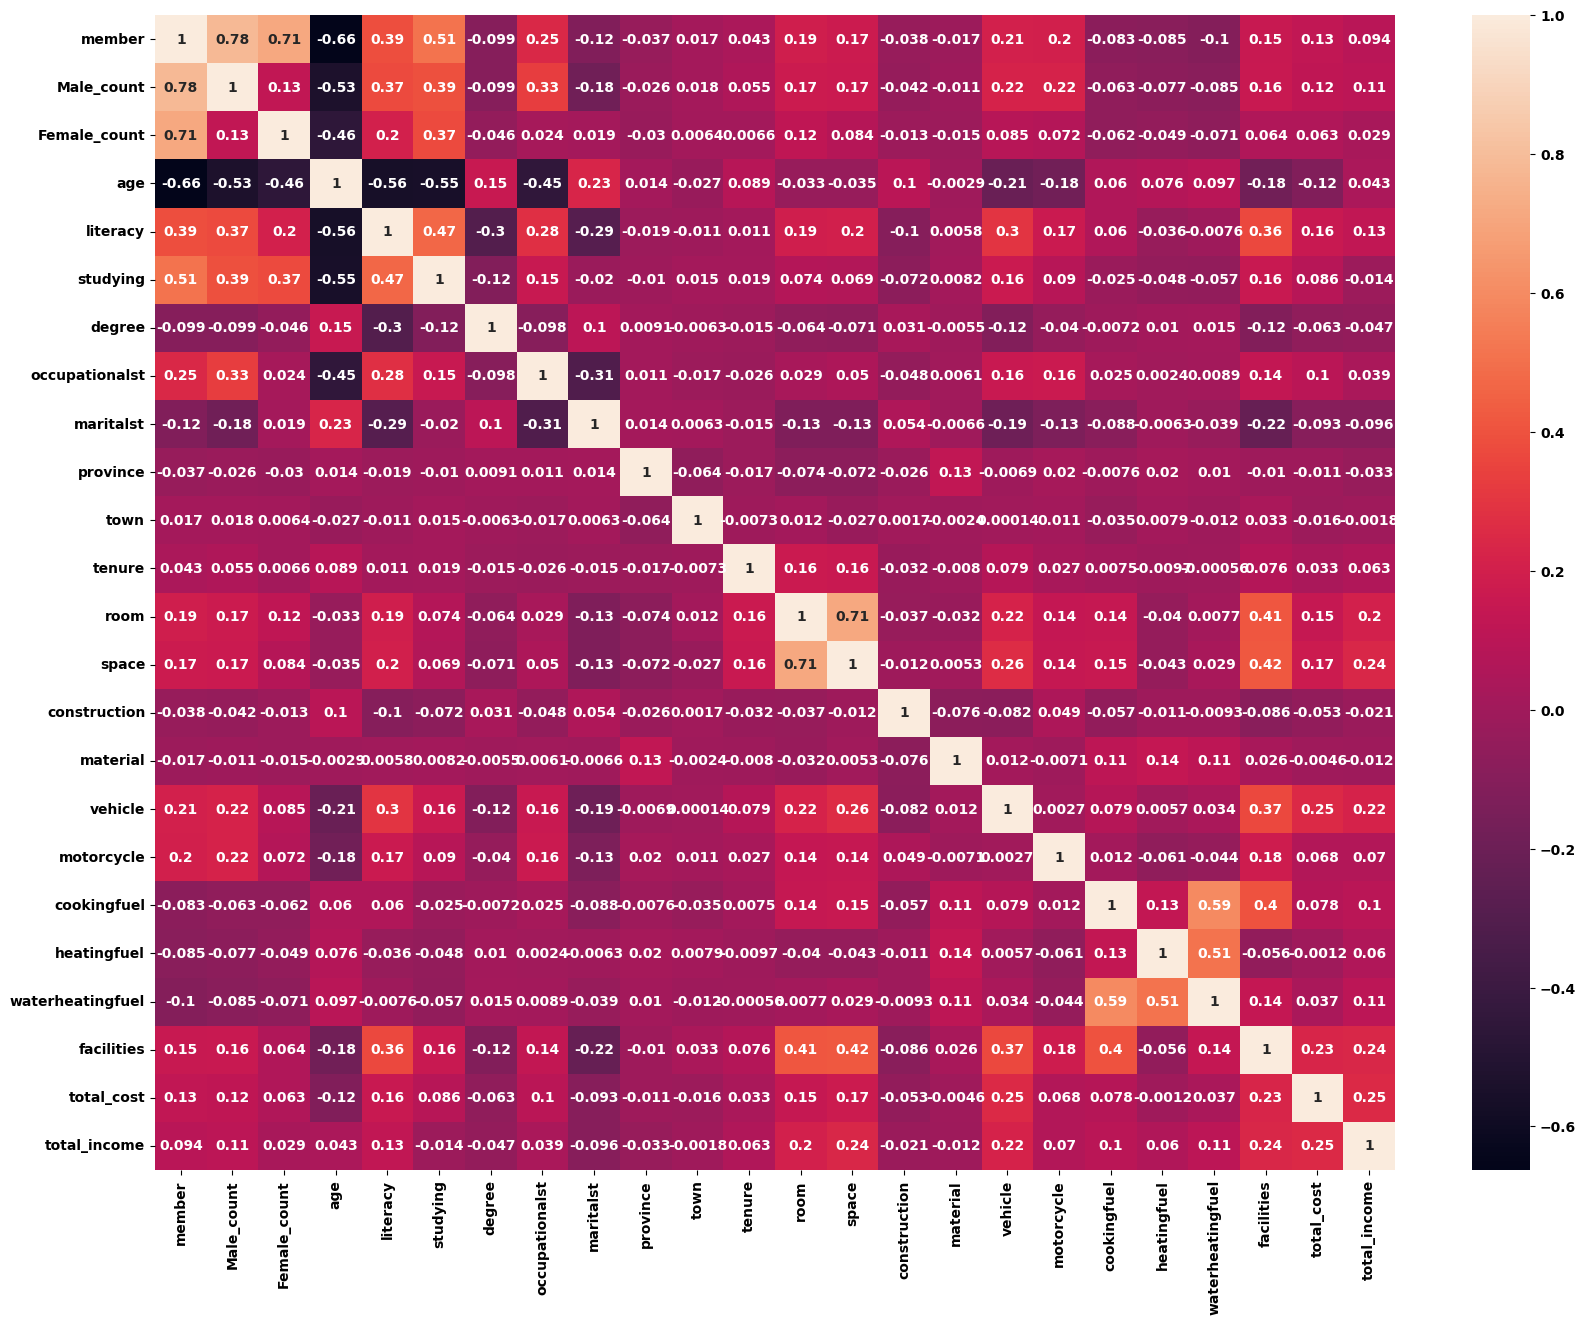

In [29]:
corr = pd.DataFrame(total_df_corr).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
سواد داشتن با میزان ازدواج رابطه عکس داره 0.28 منفی یعنی هر چقدر سواد بره بالا میزان ازدواج تو خانواده کمتر میشه
</p>



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر female_count  یک خانواده بیشتر باشه تعداد اتاق های منزل هم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر وسیله نقلیه یه خونواده بیشتر باشه هزینه هاشم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر دانش آموز بیشتری داشته باشه یه خانواده امکانات منزلش هم باید بیشتر باشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر سن بالاتر بره تو خانواده تعداد اعضای اون خانواده کمتر میشه
</p>

**Clustering after PCA**

In [30]:

# pca = PCA(2)


# df = pca.fit_transform(data_scaled)


# from sklearn.cluster import KMeans

# gmm = GaussianMixture(n_components=5)
# gmm.fit(df)
# # kmeans = KMeans(n_clusters= 6,init="k-means++")

# # label = kmeans.fit_predict(df)
# label = gmm.predict(df)

# u_labels = np.unique(label)

# # closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

# plt.subplots(figsize=(10,10))
# for i in u_labels:
#     sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
# # sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
# # sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

# plt.xlabel('x0')
# plt.ylabel('x1')
# plt.legend()
# plt.show()

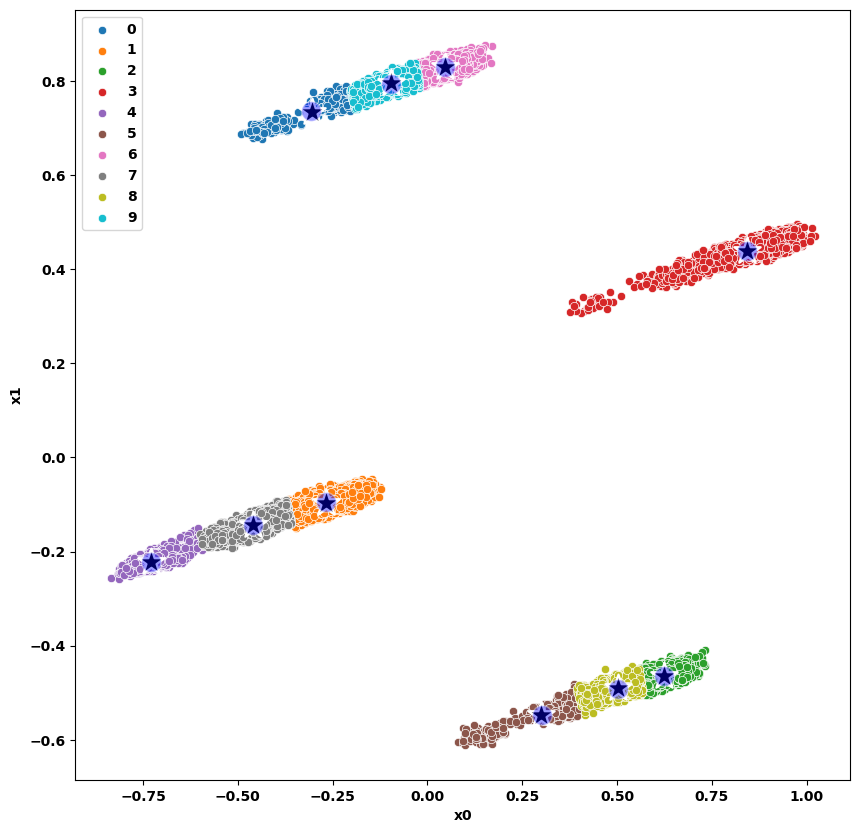

In [31]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**decision boundary visualization**

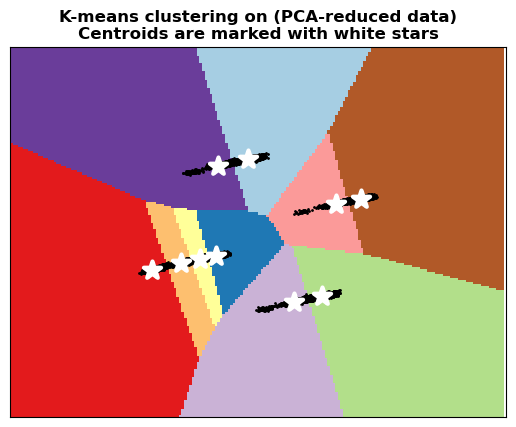

In [32]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on (PCA-reduced data)\n'
          'Centroids are marked with white stars')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
 

In [33]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_12280\3833494303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([17577,  5680, 14796,  2055, 16582, 11654,  5188,  2005,  3202,
       13449], dtype=int64)

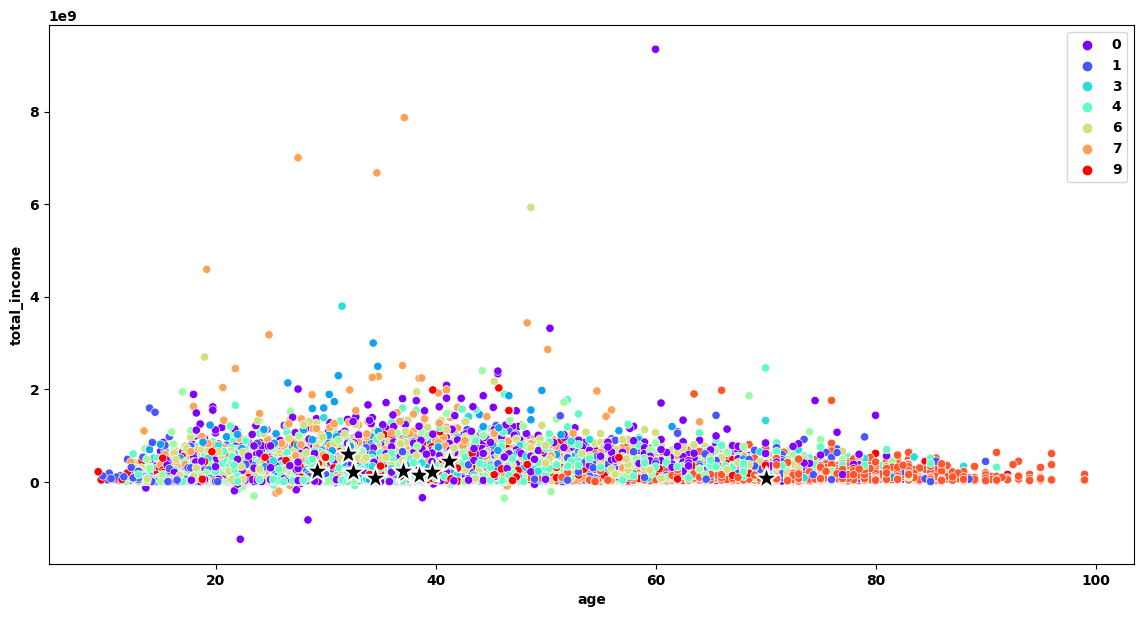

In [35]:

col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**noghate namayesh dahande marakez har cluster**

In [36]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
2055,4,2,2,32.000000,0.750000,0,1,6,257261000.0,602480000.0,3
14796,4,2,2,41.250000,0.750000,1,1,7,147991700.0,436240000.0,2
16582,4,2,2,37.000000,1.000000,0,0,6,14198552.0,238340000.0,4
2005,4,2,2,29.250000,0.750000,1,1,7,118075942.0,230380000.0,7
5188,4,2,2,32.500000,0.750000,1,0,6,63977552.0,208840000.0,6
11654,3,2,1,39.666667,0.666667,0,1,5,117565500.0,198880000.0,5
17577,4,2,2,37.250000,0.750000,1,0,6,98175552.0,174854000.0,0
5680,4,2,2,38.500000,0.500000,0,0,4,10252552.0,152300000.0,1
3202,1,0,1,70.000000,0.000000,0,0,4,13812380.0,69960000.0,8
13449,4,2,2,34.500000,0.750000,0,0,5,20527552.0,68701000.0,9


**be khanevar haye 1 nafari tavajoh konid ke aghlab hodode 70 sal sen darand**

**WCSS: It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

within cluster sum of squared distance for k=2:  9541.278273559867
within cluster sum of squared distance for k=3:  6225.882498057735
within cluster sum of squared distance for k=4:  5002.485154755678
within cluster sum of squared distance for k=5:  4604.3670759754195
within cluster sum of squared distance for k=6:  3656.757639180809
within cluster sum of squared distance for k=7:  3277.204729101998
within cluster sum of squared distance for k=8:  3061.1168674375
within cluster sum of squared distance for k=9:  2986.752279923345
within cluster sum of squared distance for k=10:  2836.1898508412546
within cluster sum of squared distance for k=11:  2707.03125897513
within cluster sum of squared distance for k=12:  2357.8021553365525
within cluster sum of squared distance for k=13:  2198.1335210160064
within cluster sum of squared distance for k=14:  2099.686973000791
within cluster sum of squared distance for k=15:  2056.6956121131925
within cluster sum of squared distance for k=16:  2019

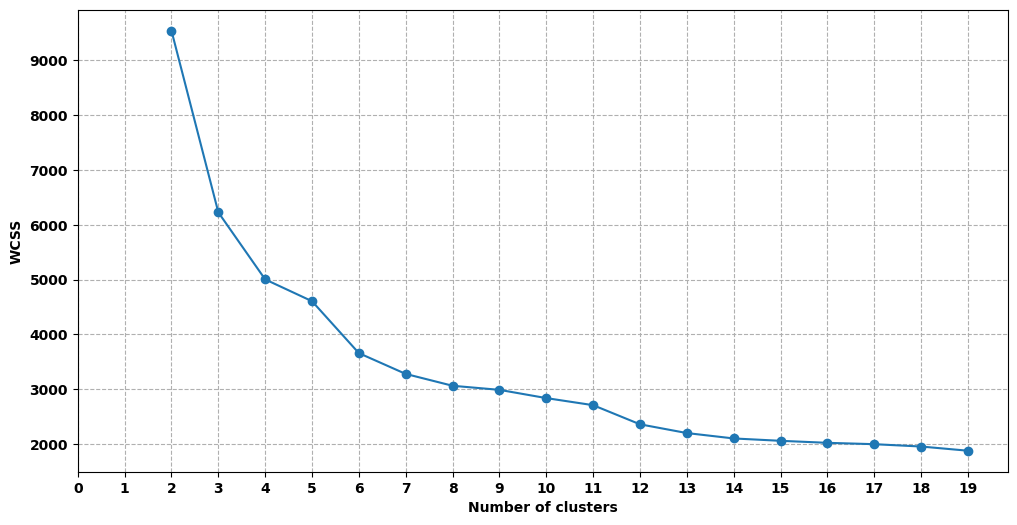

In [37]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette: The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


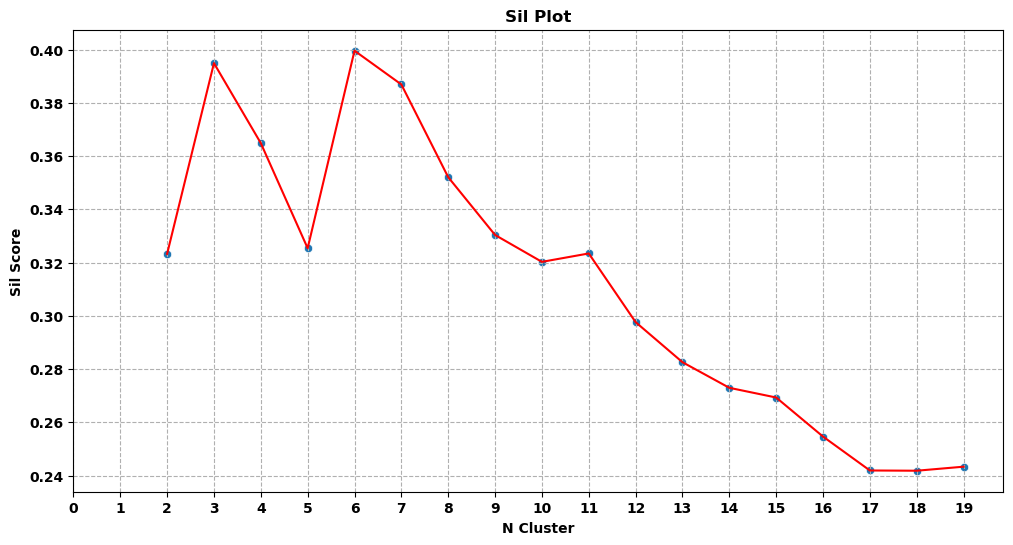

In [38]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Silhouette Visualizer**

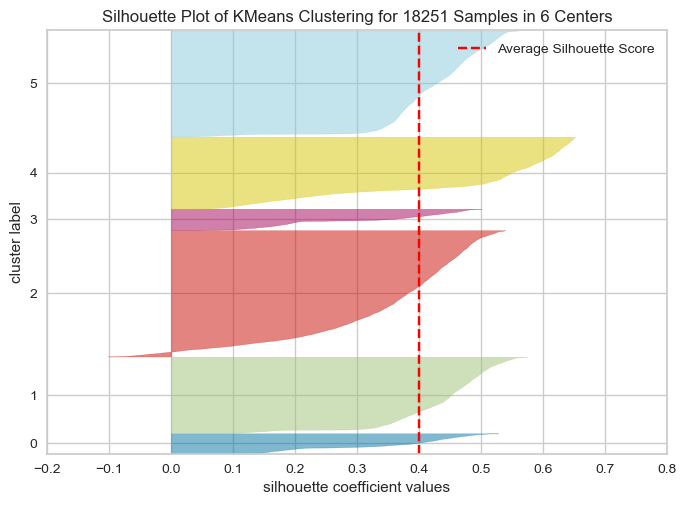

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18251 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
در این نمایش از Sil درواقع خط چین قرمز میانگین Sil میباشد که اولا هر چه این مقدار به 1 نزدیک تر باشد خوشه های بهتری داریم ثانیا سایزخوشه ها هم باید تقریبا یکسان باشد مثلا در مثال بالا اگر k=6 میشد مقدار sil  به کمتر از 0.5 کاهش میافت و سایز خوشه ها کوچک و بزرگ میشد بنابراین بهترین مقدار برای k همین 5 است.
</p>

**Decision Boundary**

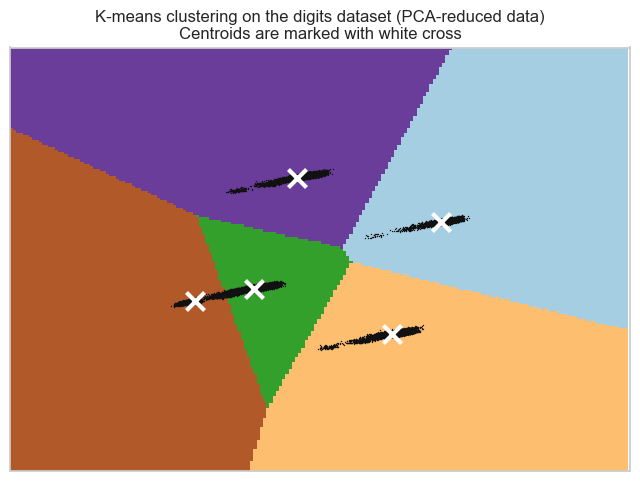

In [40]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [53]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_12280\3197195845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([13449, 16714,  4945, 13834,  8735, 16180], dtype=int64)

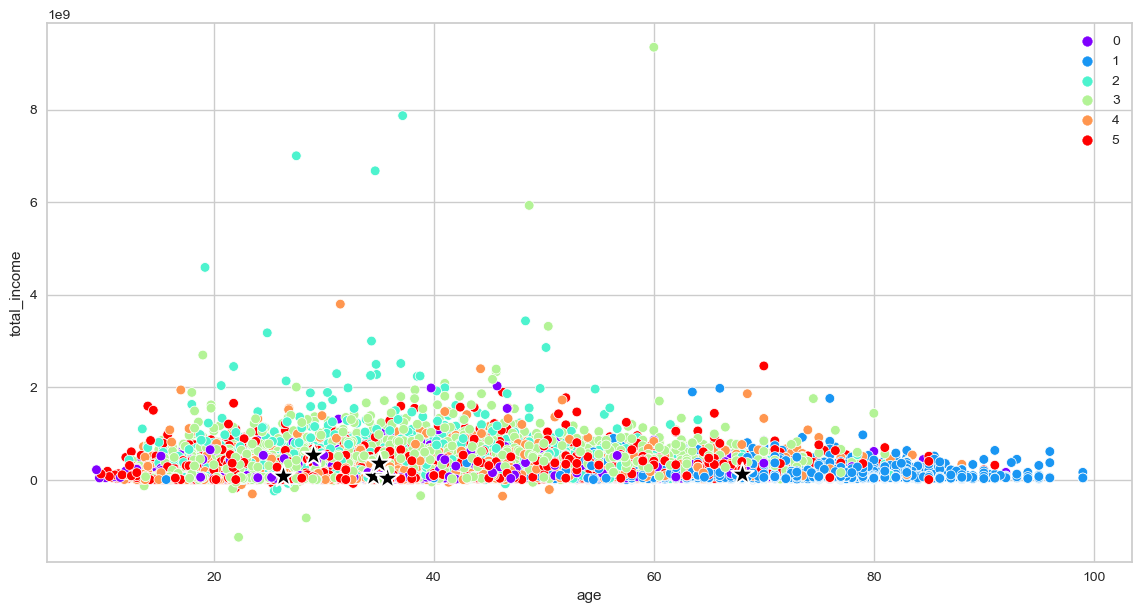

In [54]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [55]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
13834,4,2,2,29.00,0.75,1,0,6,119444000.0,521840000.0,3
16180,4,2,2,35.00,0.75,0,0,5,33210000.0,361780000.0,5
16714,2,1,1,68.00,0.00,0,0,4,7326776.0,116720000.0,1
4945,4,2,2,26.25,0.75,1,1,7,69506552.0,77440000.0,2
13449,4,2,2,34.50,0.75,0,0,5,20527552.0,68701000.0,0
8735,4,2,2,35.75,0.75,0,1,6,41154866.0,26960000.0,4


<b><p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
تلاش هایی برای نمایش بهتر شکست در دونمودار Sil و elbow  برای یافتن بهترین مقدار k
</p></b>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
pca اگر اسکیل داده ها نامناسب باشد کمک خاصی به بهتر شدن نمودار elbow ,Silhouette نمی کند
</p>

**pca for finding k**

In [44]:
pca = PCA(5)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

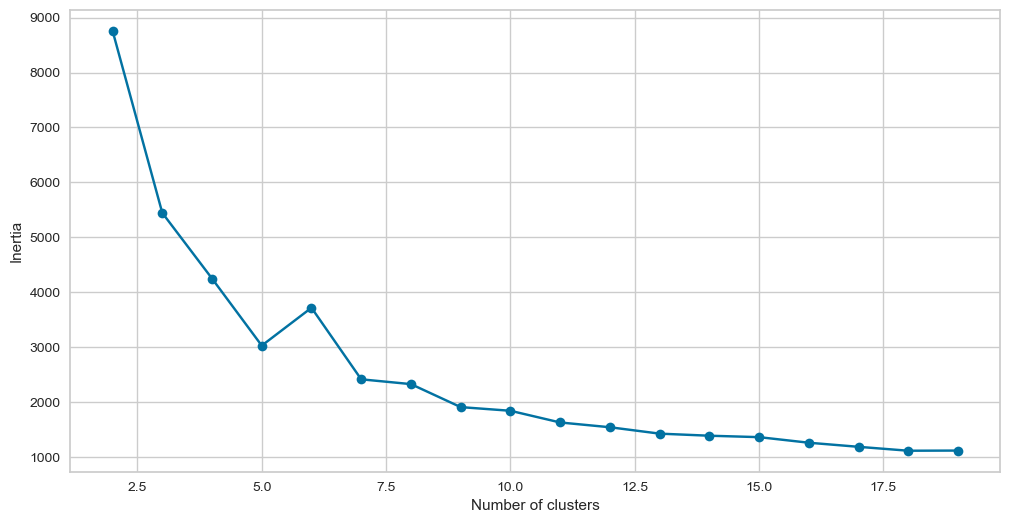

In [45]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


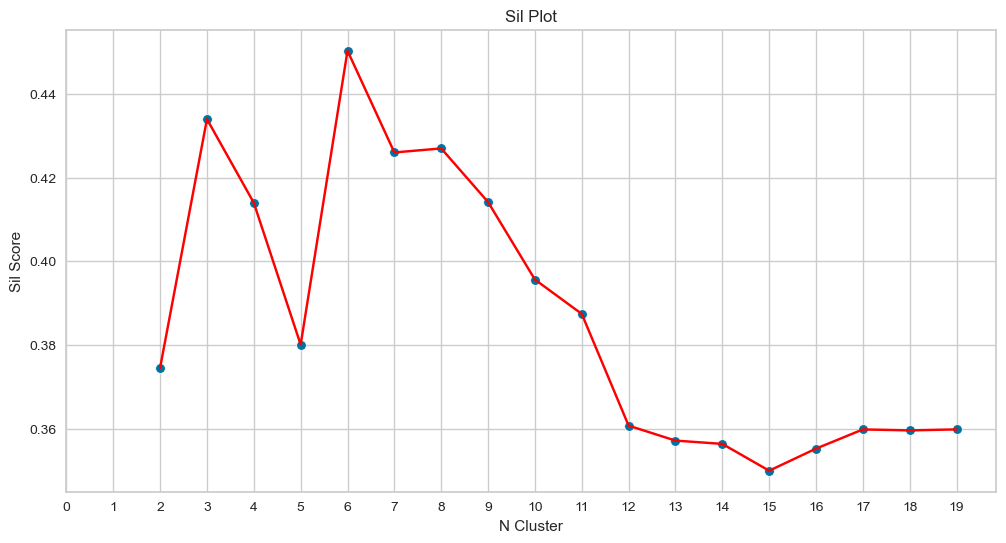

In [46]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

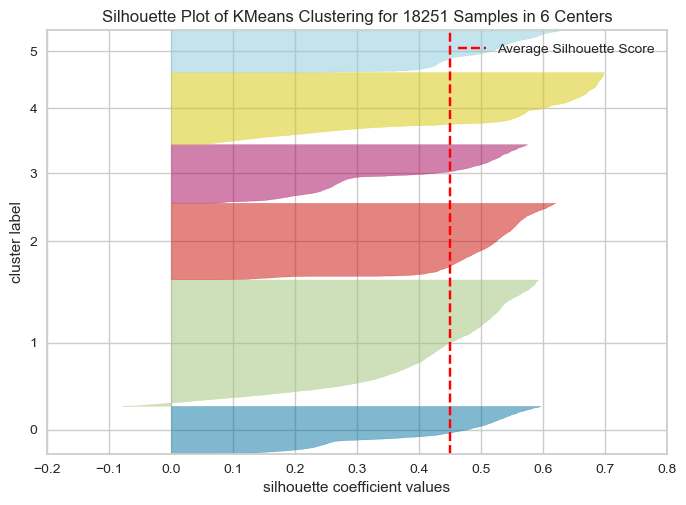

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18251 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [48]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++",random_state=42).fit(df)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_12280\3092095364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([4699, 9415, 5001, 8287, 3543, 6402], dtype=int64)

In [49]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
8287,5,4,1,47.200000,0.800000,1,0,6,168925245.0,276110000.0,3
3543,2,1,1,51.000000,0.000000,0,0,6,21819260.0,242900000.0,4
4699,5,4,1,44.800000,0.800000,1,0,6,76029940.0,163500000.0,0
6402,4,2,2,23.250000,0.750000,1,1,8,240593552.0,154780000.0,5
9415,4,2,2,25.500000,0.750000,0,0,6,92262552.0,80198000.0,1
5001,3,1,2,22.333333,0.666667,0,1,6,38998164.0,25327000.0,2


In [50]:
total_df.loc[total_df.Clusters == 5, ].age.mean()

33.40446105789489

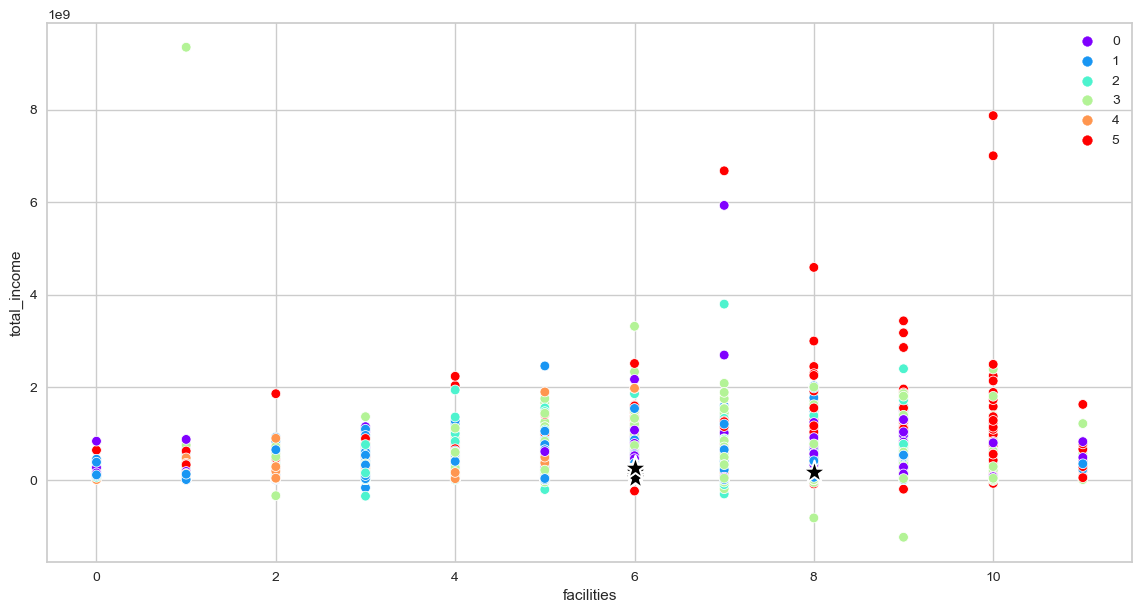

In [51]:
col0='facilities'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()